In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
# Cargamos los datos
data = pd.read_csv('../../Data/DR3/espectros_normalizados_balanceados_SNG.csv')
X = data.drop(data.columns[-1], axis=1)
y = data.iloc[:, -1]

In [3]:
# Crear el modelo SVM
#svm = SVC(kernel='linear', C=1)

# Realizar la validación cruzada con 5 folds
#scores = cross_val_score(svm, X, y, cv=5)

# Imprimir la precisión media y la desviación estándar de la precisión
#print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [4]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de clasificación SVM
#svm = SVC(kernel='rbf', C=1, gamma='auto') ##REVISA LOS KERNELS
svm = SVC(kernel='linear', C=1)
# Entrenamos el modelo utilizando el conjunto de entrenamiento
svm.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

In [5]:
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.9209225700164745


In [6]:
from sklearn.metrics import confusion_matrix

# Predicción y evaluación del modelo
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)

Accuracy: 0.9209225700164745
Confusion matrix:
 [[206   7   2]
 [  9 176  20]
 [  3   7 177]]


In [7]:
from sklearn.metrics import cohen_kappa_score, classification_report

print("Cohen's kappa: ", cohen_kappa_score(y_test,y_pred))
print()
print(classification_report(y_test, y_pred, labels=[1,2,3], digits=4))

Cohen's kappa:  0.8812791342047788

              precision    recall  f1-score   support

           1     0.9450    0.9581    0.9515       215
           2     0.9263    0.8585    0.8911       205
           3     0.8894    0.9465    0.9171       187

    accuracy                         0.9209       607
   macro avg     0.9202    0.9211    0.9199       607
weighted avg     0.9216    0.9209    0.9205       607



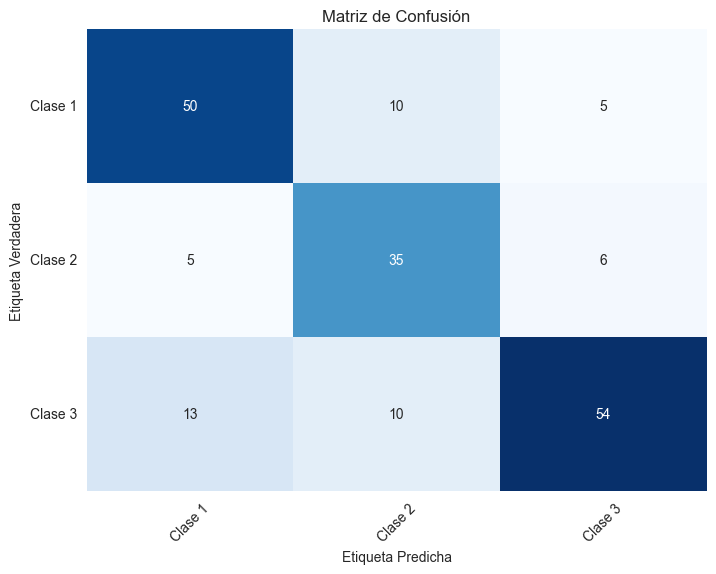

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    ax.set_xlabel('Etiqueta Predicha')
    ax.set_ylabel('Etiqueta Verdadera')
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes, rotation=0)
    ax.set_title('Matriz de Confusión')


# Ejemplo de uso
confusion_matrix = np.array([[50, 10, 5], [5, 35, 6], [13, 10, 54]])
class_names = ['Clase 1', 'Clase 2', 'Clase 3']
plot_confusion_matrix(confusion_matrix, class_names)
plt.show()